# 1: Import required packages & functions <a class="anchor" id="chapter1"></a>

In [1]:
# clear all variables
for i in list(globals().keys()):
    if(i[0] != '_'):
        exec('del {}'.format(i))

#suppress future warnings -- not really a good idea 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
        
# suppress future warnings -- not really a good idea 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import csv
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') # uses vector figures in pdf exports
plt.style.use('seaborn-pastel')

# create a folder
def create_folder(folder):
    import os     
    try: 
        os.mkdir(folder) 
    except FileExistsError:
        print("Directory [ %s ] already exists"%folder)

#create folder to store results
create_folder('CFAS and ADNI')
create_folder('CFAS and ADNI/data')
create_folder('CFAS and ADNI/figure')

Directory [ CFAS and ADNI ] already exists
Directory [ CFAS and ADNI/data ] already exists
Directory [ CFAS and ADNI/figure ] already exists


# 2: CFAS and ADNI Combined Data <a class="anchor" id="chapter2"></a>

In [2]:
# extract dataset
cfas_combined = pd.read_csv(r'CFAS and ADNI/data/cfas_combined_numeric_Binary_Remove(MCI).csv',header = 0)

In [3]:
# extract dataset
adni_combined = pd.read_csv(r'CFAS and ADNI/data/adni_combined_numeric_Binary_Remove(MCI).csv',header = 0)

In [4]:
cfas_mlr_result = pd.read_csv(r'CFAS and ADNI/data/cfas_mlr_result.csv',header = 0)
adni_mlr_result = pd.read_csv(r'CFAS and ADNI/data/adni_mlr_result.csv',header = 0)

cfas_features_percentage = pd.read_csv(r'Ranking/cfas_features_percentage_sorted.csv',header = 0)
adni_features_percentage = pd.read_csv(r'Ranking/adni_features_percentage_sorted.csv',header = 0)

cfas_features_percentage.Features = cfas_features_percentage.Features.str.replace('/',' ')
adni_features_percentage.Features = adni_features_percentage.Features.str.replace('/',' ')
cfas_mlr_result.Features = cfas_mlr_result.Features.str.replace('_',' ')
adni_mlr_result.Features = adni_mlr_result.Features.str.replace('_',' ')

# ADNI & CFAS Feature-Feature Correlation Ranking

In [5]:
cfas_df = pd.DataFrame(cfas_combined).copy()
cfas_df.drop(['ID'], inplace=True, axis=1)
cfas_df.dropna(subset=['diagnostic'], inplace=True)
cfas_df.reset_index(drop=True, inplace=True)

adni_df = pd.DataFrame(adni_combined).copy()

# Ploting R-squared and feature ranking

In [6]:
from sklearn.preprocessing import MinMaxScaler

# load all filter methods scores obtained from weka
cfas_values = pd.read_csv(r'Ranking/cfas_values.csv',header = 0)
adni_values = pd.read_csv(r'Ranking/adni_values.csv',header = 0)

cfas_weka_results = pd.read_csv(r'Ranking/cfas_weka_results_all.csv',header = 0)
adni_weka_results = pd.read_csv(r'Ranking/adni_weka_results_all.csv',header = 0)

# raname columns
cfas_values.columns = ['Features', 'chi', 'gr', 'ig', 'rf', 'su', 'll', 'va']
adni_values.columns = ['Features', 'chi', 'gr', 'ig', 'rf', 'su', 'll', 'va']

cfas_values.Features = cfas_values.Features.str.replace('_',' ')
cfas_values.Features = cfas_values.Features.str.replace('/',' ')

adni_values.Features = adni_values.Features.str.replace('_',' ')
adni_values.Features = adni_values.Features.str.replace('/',' ')

def ranking_results(data):
    df = pd.DataFrame()
    for method in ['chi', 'gr', 'ig', 'rf', 'su', 'll', 'va']:
        exec("%s"%method+" = pd.DataFrame()")
        exec("%s"%method+"= data[['Features', '%s"%method+"']]")
        exec("%s"%method+".sort_values(by='%s"%method+"', ascending=False, inplace=True)")
        exec("%s"%method+".reset_index(drop=True, inplace=True)")
        exec("df[['F_%s"%method+"', '%s"%method+"']] = %s"%method+"[['Features', '%s"%method+"']]")
        
        # scale the filter methods values
        exec("scaler = MinMaxScaler()")
        exec("df['%s"%method+"'] = scaler.fit_transform(df[['%s"%method+"']])")

    return df

# call function to add feature columns for each method and sort them
cfas_v = ranking_results(cfas_values)
adni_v = ranking_results(adni_values)


In [7]:
create_folder('filter_methods')
# sort r2 for adni and cfas
cfas_mlr_result.sort_values(by='Features', ascending=True, ignore_index=True, 
                            inplace=True, key=lambda x: x.str.lower())
adni_mlr_result.sort_values(by='Features', ascending=True, ignore_index=True, 
                            inplace=True, key=lambda x: x.str.lower())

cfas_mlr_result['number'] = np.arange(1,14,1)
adni_mlr_result['number'] = np.arange(1,14,1)

# loop through all filter methods
for method in ['chi', 'gr', 'ig', 'rf', 'su', 'll', 'va']:
    #create dataframe for each filter method in CFAS
    exec("cfas_%s"%method+" = pd.DataFrame(cfas_v[['F_%s"%method+"', '%s"%method+"']]).copy()")
    exec("cfas_%s"%method+".sort_values(by='F_%s"%method+"', ascending=True, ignore_index=True,inplace=True, key=lambda x: x.str.lower())")
    exec("cfas_%s"%method+"['r2'] = cfas_mlr_result.R2")
    exec("cfas_%s"%method+"['number'] = cfas_mlr_result.number")
    exec("cfas_%s"%method+".to_csv(r'filter_methods/cfas_%s"%method+".csv',index=False)")
    
    #create dataframe for each filter method in ADNI
    exec("adni_%s"%method+" = pd.DataFrame(adni_v[['F_%s"%method+"', '%s"%method+"']]).copy()")
    exec("adni_%s"%method+".sort_values(by='F_%s"%method+"', ascending=True, ignore_index=True,inplace=True, key=lambda x: x.str.lower())")
    exec("adni_%s"%method+"['r2'] = adni_mlr_result.R2")   
    exec("adni_%s"%method+"['number'] = adni_mlr_result.number")
    exec("adni_%s"%method+".to_csv(r'filter_methods/adni_%s"%method+".csv',index=False)")


Directory [ filter_methods ] already exists


Directory [ Figures ] already exists


<Figure size 432x288 with 0 Axes>

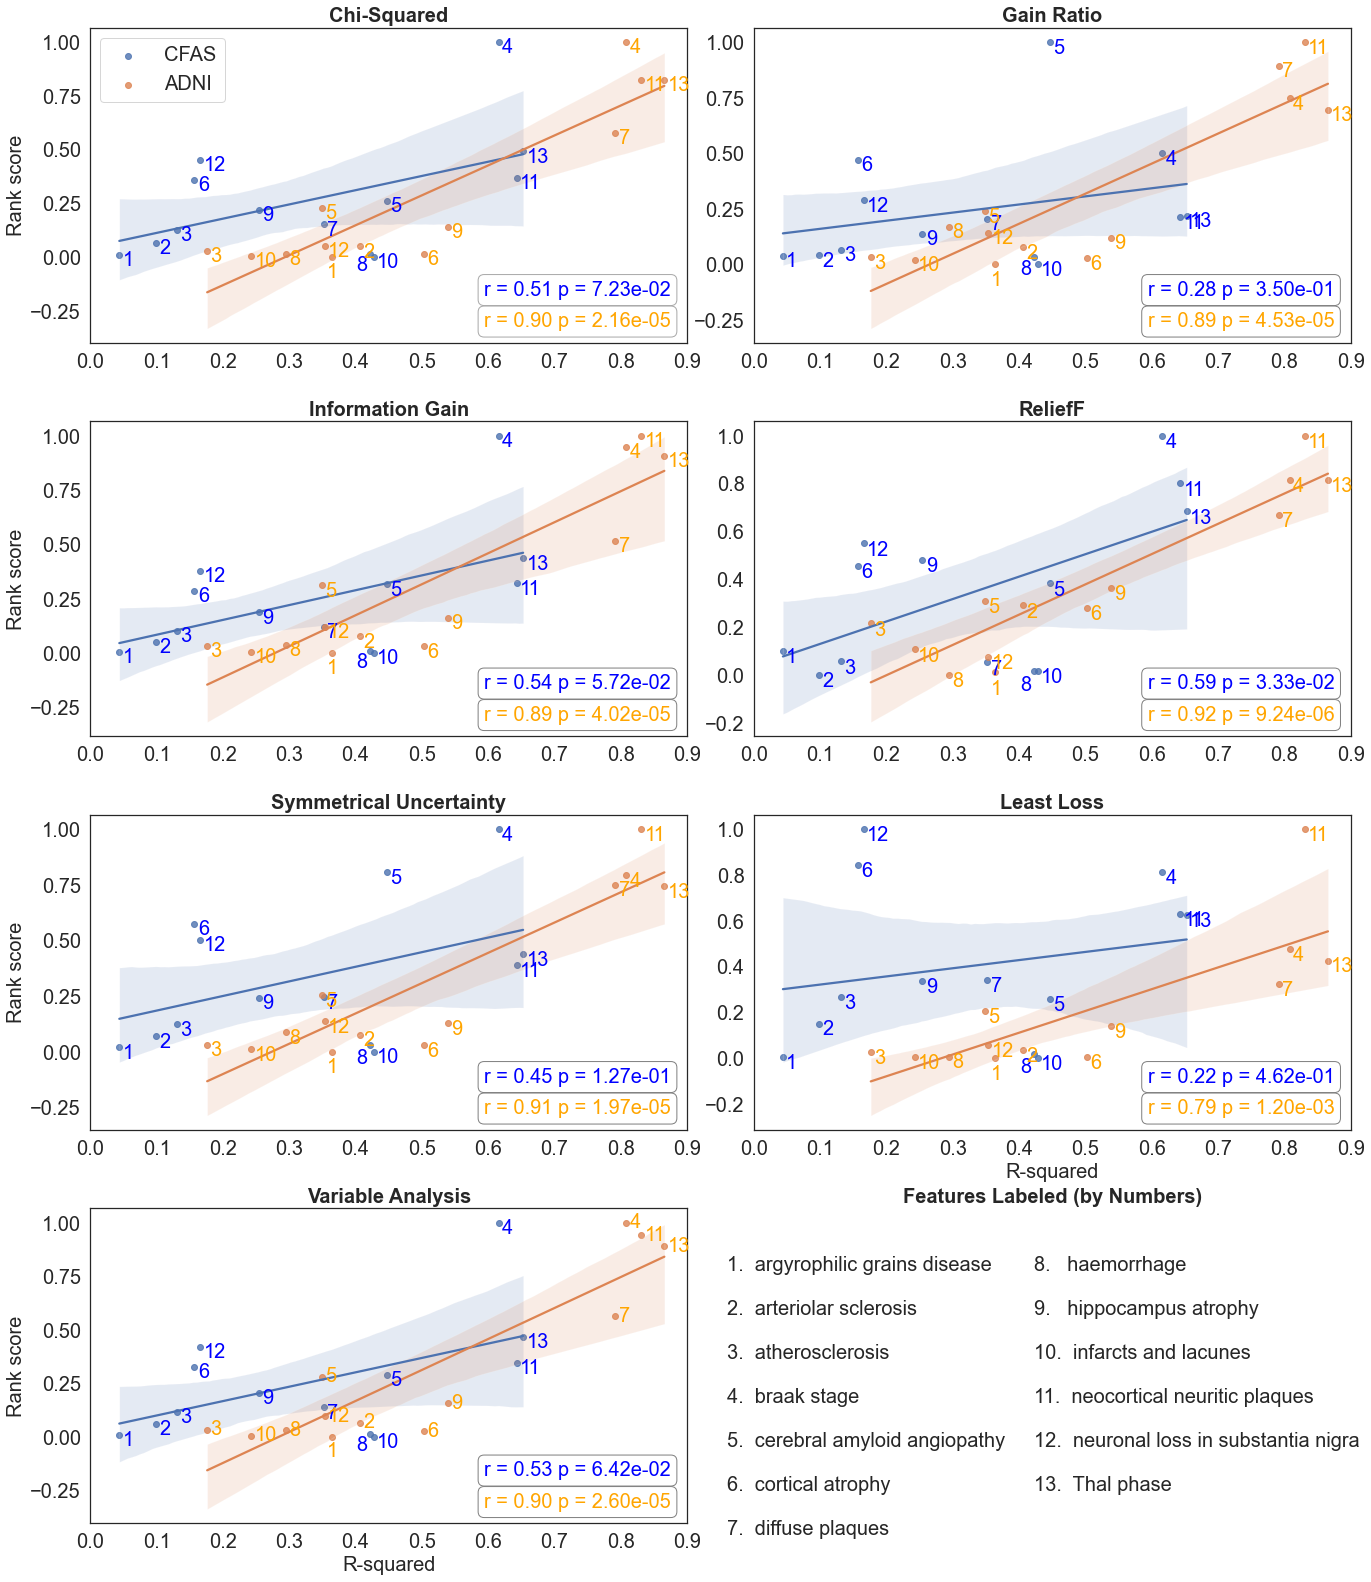

In [8]:
import scipy.stats as stats
create_folder('Figures')
sns.set_theme(style="white")
size = 20
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels


ci = 95
n_boot= 2000

plt.subplots_adjust(wspace=1.5)
# fig= plt.figure(figsize=(20,20))
fig, axes = plt.subplots(figsize=(19,22))


ax = plt.subplot(4,2,1)
cfas_ = sns.regplot(x = "r2", y = "chi", data = cfas_chi, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "chi", data = adni_chi, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_chi['chi'], cfas_chi['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkgrey", lw=1))
r, p = stats.pearsonr(adni_chi['chi'], adni_chi['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkgrey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Chi-Squared', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Rank score')
plt.legend()
# Loop through the data points
cfas_chi_num=[4,6,8,10,12]
adni_chi_num=[1,3,4,5,6,9]
for i, num in enumerate (cfas_chi.number):
    if num == 8:
        plt.text(cfas_chi.r2[i]-0.02, cfas_chi.chi[i]-0.08, num, color='blue', fontsize=size)
    else:
        plt.text(cfas_chi.r2[i]+0.005, cfas_chi.chi[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_chi.number):
    if num == 1:
        plt.text(adni_chi.r2[i]-0.007, adni_chi.chi[i]-0.095, num, color='orange', fontsize=size)
    else:
        plt.text(adni_chi.r2[i]+0.005, adni_chi.chi[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()


ax = plt.subplot(4,2,2)
cfas_ = sns.regplot(x = "r2", y = "gr", data = cfas_gr, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "gr", data = adni_gr, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_gr['gr'], cfas_gr['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_gr['gr'], adni_gr['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Gain Ratio', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
# plt.legend()
# Loop through the data points 
cfas_gr_num=[5,6,8,10]
adni_gr_num=[1,3,6,7,8,9,11]
for i, num in enumerate (cfas_gr.number):
    if num == 8:
        plt.text(cfas_gr.r2[i]-0.02, cfas_gr.gr[i]-0.08, num, color='blue', fontsize=size)
    else:
        plt.text(cfas_gr.r2[i]+0.005, cfas_gr.gr[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_gr.number):
    if num == 1:
        plt.text(adni_gr.r2[i]-0.007, adni_gr.gr[i]-0.095, num, color='orange', fontsize=size)
    else:
        plt.text(adni_gr.r2[i]+0.005, adni_gr.gr[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,3)
cfas_ = sns.regplot(x = "r2", y = "ig", data = cfas_ig, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "ig", data = adni_ig, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_ig['ig'], cfas_ig['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_ig['ig'], adni_ig['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Information Gain', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Rank score')
# plt.legend()
# Loop through the data points
cfas_ig_num=[4,6,8,10,12]
adni_ig_num=[1,3,4,5,6,9,11]
for i, num in enumerate (cfas_ig.number):
    if num == 8:
        plt.text(cfas_ig.r2[i]-0.02, cfas_ig.ig[i]-0.08, num, color='blue', fontsize=size)
    else:
        plt.text(cfas_ig.r2[i]+0.005, cfas_ig.ig[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_ig.number):
    if num == 1:
        plt.text(adni_ig.r2[i]-0.007, adni_ig.ig[i]-0.095, num, color='orange', fontsize=size)
    else:
        plt.text(adni_ig.r2[i]+0.005, adni_ig.ig[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,4)
cfas_ = sns.regplot(x = "r2", y = "rf", data = cfas_rf, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "rf", data = adni_rf, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_rf['rf'], cfas_rf['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_rf['rf'], adni_rf['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('ReliefF', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
# plt.legend()
# Loop through the data points 
cfas_rf_num=[4,6,7,8,9,10,12]
adni_rf_num=[1,3,11]
for i, num in enumerate (cfas_rf.number):
    if num == 8:
        plt.text(cfas_rf.r2[i]-0.02, cfas_rf.rf[i]-0.08, num, color='blue', fontsize=size)
    else:
        plt.text(cfas_rf.r2[i]+0.005, cfas_rf.rf[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_rf.number):
    if num == 1:
        plt.text(adni_rf.r2[i]-0.007, adni_rf.rf[i]-0.095, num, color='orange', fontsize=size)
    else:
        plt.text(adni_rf.r2[i]+0.005, adni_rf.rf[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,5)
cfas_ = sns.regplot(x = "r2", y = "su", data = cfas_su, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "su", data = adni_su, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_su['su'], cfas_su['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_su['su'], adni_su['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Symmetrical Uncertainty', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Rank score')
# plt.legend()
# Loop through the data points
cfas_su_num=[4,5,6,8,10,12]
adni_su_num=[1,3,5,6,9,11]
for i, num in enumerate (cfas_su.number):
    if num == 8:
        plt.text(cfas_su.r2[i]-0.02, cfas_su.su[i]-0.08, num, color='blue', fontsize=size)
    else:
        plt.text(cfas_su.r2[i]+0.005, cfas_su.su[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_su.number):
    if num == 1:
        plt.text(adni_su.r2[i]-0.007, adni_su.su[i]-0.095, num, color='orange', fontsize=size)
    else:
        plt.text(adni_su.r2[i]+0.005, adni_su.su[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,6)
cfas_ = sns.regplot(x = "r2", y = "ll", data = cfas_ll, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "ll", data = adni_ll, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_ll['ll'], cfas_ll['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_ll['ll'], adni_ll['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Least Loss', fontsize=20, fontweight='bold')
plt.xlabel('R-squared')
plt.ylabel('')
# plt.legend()
# Loop through the data points 
cfas_ll_num=[4,6,8,10,12]
adni_ll_num=[1,3,5,6,11]
for i, num in enumerate (cfas_ll.number):
    if num == 8:
        plt.text(cfas_ll.r2[i]-0.02, cfas_ll.ll[i]-0.08, num, color='blue', fontsize=size)
    else:
        plt.text(cfas_ll.r2[i]+0.005, cfas_ll.ll[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_ll.number):
    if num == 1:
        plt.text(adni_ll.r2[i]-0.007, adni_ll.ll[i]-0.095, num, color='orange', fontsize=size)
    else:
        plt.text(adni_ll.r2[i]+0.005, adni_ll.ll[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,7)
cfas_ = sns.regplot(x = "r2", y = "va", data = cfas_va, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "va", data = adni_va, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_va['va'], cfas_va['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_va['va'], adni_va['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Variable Analysis', fontsize=20, fontweight='bold')
plt.xlabel('R-squared')
plt.ylabel('Rank score')

# Loop through the data points 
cfas_va_num=[4,6,8,10,12]
adni_va_num=[1,3,4,5,6,9,11]
for i, num in enumerate (cfas_va.number):
    if num == 8:
        plt.text(cfas_va.r2[i]-0.02, cfas_va.va[i]-0.08, num, color='blue', fontsize=size)
    else:
        plt.text(cfas_va.r2[i]+0.005, cfas_va.va[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_va.number):
    if num == 1:
        plt.text(adni_va.r2[i]-0.007, adni_va.va[i]-0.095, num, color='orange', fontsize=size)
    else:
        plt.text(adni_va.r2[i]+0.005, adni_va.va[i]-0.025, num, color='orange', fontsize=size)
# plt.legend()#loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)

ax = plt.subplot(4,2,8)
ax.text(-0.045, 0.85, '1.  argyrophilic grains disease\n\n2.  arteriolar sclerosis\n\n3.  atherosclerosis\n\n4.  braak stage\n\n5.  cerebral amyloid angiopathy\n\n6.  cortical atrophy\n\n7.  diffuse plaques',
        size=20, ha='left', va='top')
ax.text(0.47, 0.85, '8.   haemorrhage\n\n9.   hippocampus atrophy\n\n10.  infarcts and lacunes\n\n11.  neocortical neuritic plaques\n\n12.  neuronal loss in substantia nigra\n\n13.  Thal phase',
        size=20, ha='left', va='top')

ax.set_xticklabels([])
ax.set_xticks([])
ax.axes.get_xaxis().set_visible(False)
ax.set_yticklabels([])
ax.set_yticks([])
ax.axes.get_yaxis().set_visible(False)
ax.axis("off")
plt.title('Features Labeled (by Numbers)', fontsize=20, fontweight='bold')#, color='#345DA0')
plt.tight_layout(pad=0.4, w_pad=0.2, h_pad=0.3)



Directory [ Figures ] already exists


<Figure size 432x288 with 0 Axes>

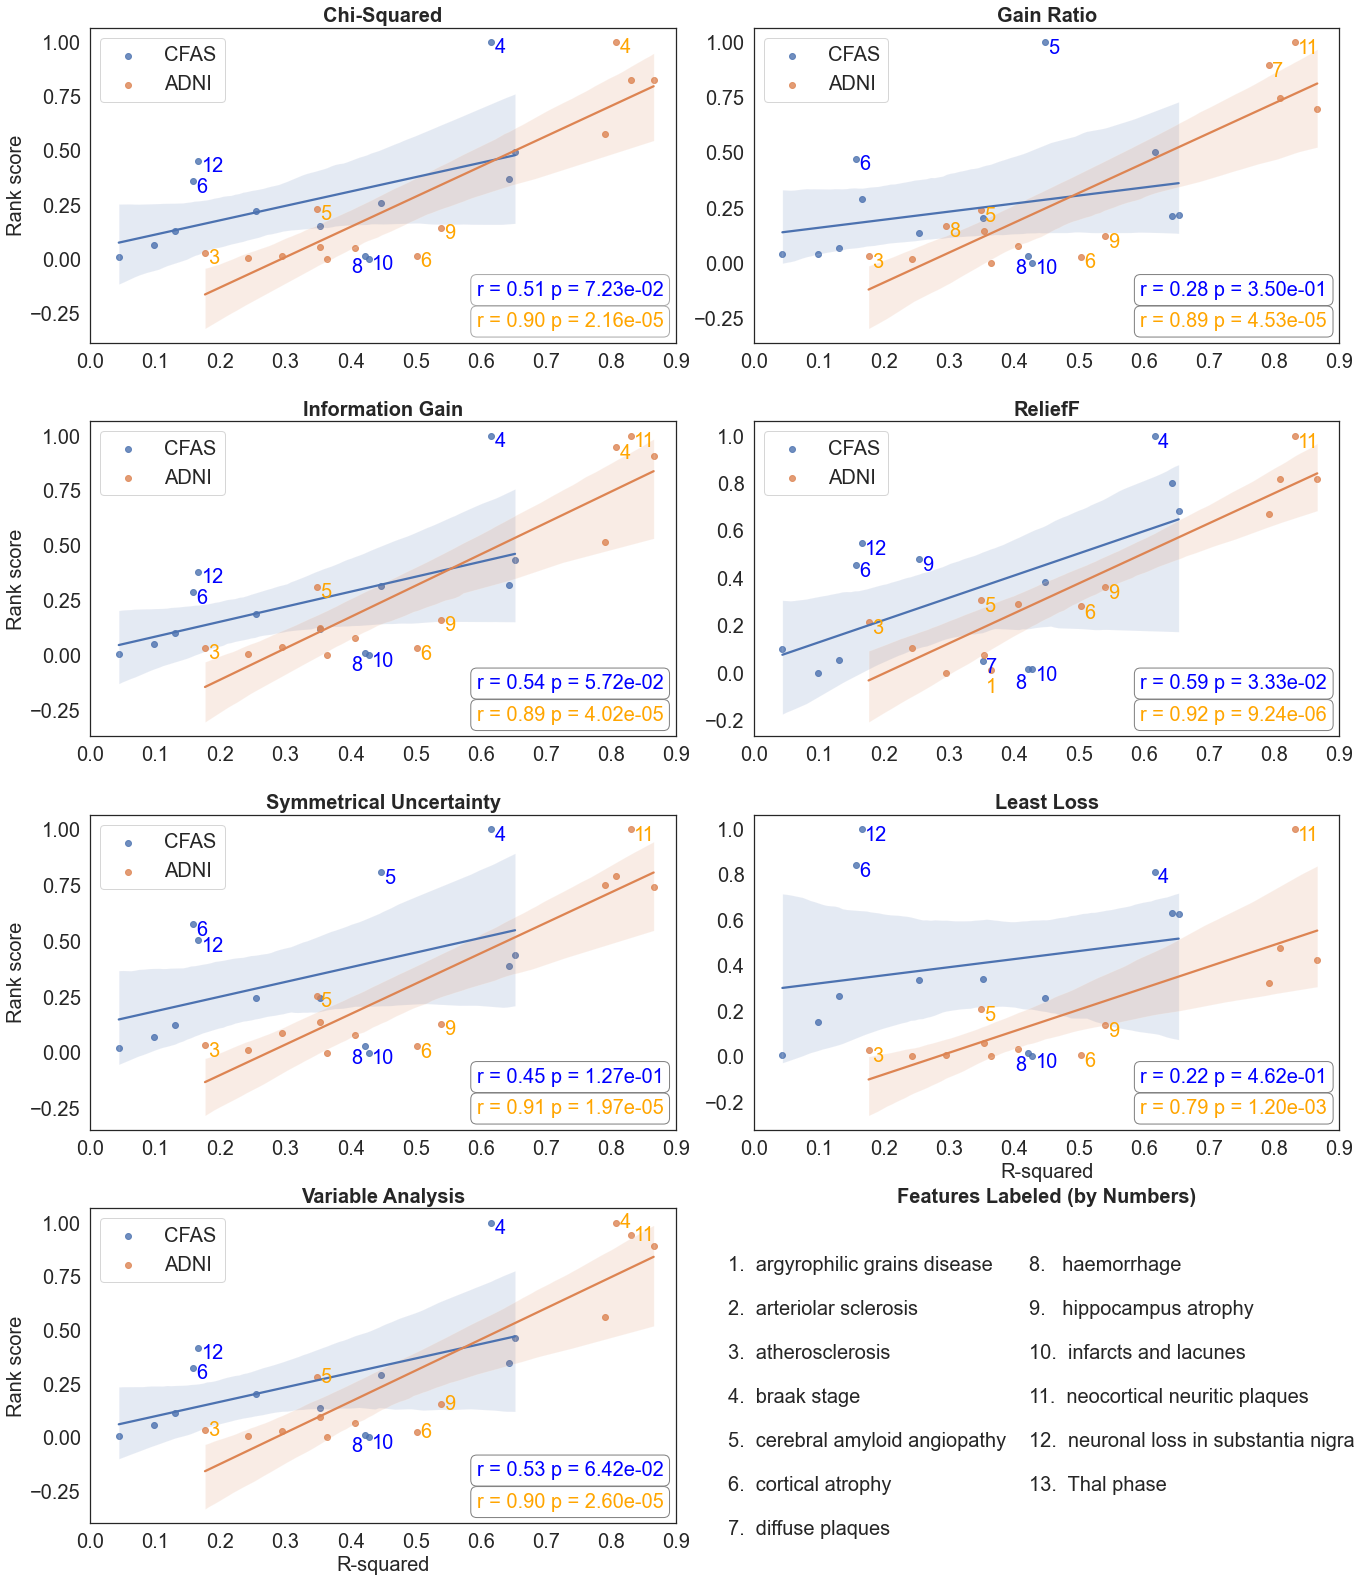

In [9]:
import scipy.stats as stats
create_folder('Figures')
sns.set_theme(style="white")
size = 20
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels


ci = 95
n_boot= 1000

plt.subplots_adjust(wspace=1.5)
# fig= plt.figure(figsize=(20,20))
fig, axes = plt.subplots(figsize=(19,22))


ax = plt.subplot(4,2,1)
cfas_ = sns.regplot(x = "r2", y = "chi", data = cfas_chi, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "chi", data = adni_chi, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_chi['chi'], cfas_chi['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkgrey", lw=1))
r, p = stats.pearsonr(adni_chi['chi'], adni_chi['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkgrey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Chi-Squared', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Rank score')
plt.legend()
# Loop through the data points
cfas_chi_num=[4,6,8,10,12]
adni_chi_num=[3,4,5,6,9]
for i, num in enumerate (cfas_chi.number):
    if num in (cfas_chi_num):
        if num == 8:
            plt.text(cfas_chi.r2[i]-0.02, cfas_chi.chi[i]-0.08, num, color='blue', fontsize=size)
        else:
            plt.text(cfas_chi.r2[i]+0.005, cfas_chi.chi[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_chi.number):
    if num in (adni_chi_num):
        if num == 1:
            plt.text(adni_chi.r2[i]-0.007, adni_chi.chi[i]-0.095, num, color='orange', fontsize=size)
        else:
            plt.text(adni_chi.r2[i]+0.005, adni_chi.chi[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()


ax = plt.subplot(4,2,2)
cfas_ = sns.regplot(x = "r2", y = "gr", data = cfas_gr, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "gr", data = adni_gr, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_gr['gr'], cfas_gr['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_gr['gr'], adni_gr['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Gain Ratio', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.legend()
# Loop through the data points 
cfas_gr_num=[5,6,8,10]
adni_gr_num=[3,5,6,7,8,9,11]
for i, num in enumerate (cfas_gr.number):
    if num in (cfas_gr_num):
        if num == 8:
            plt.text(cfas_gr.r2[i]-0.02, cfas_gr.gr[i]-0.08, num, color='blue', fontsize=size)
        else:
            plt.text(cfas_gr.r2[i]+0.005, cfas_gr.gr[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_gr.number):
    if num in (adni_gr_num):
        if num == 1:
            plt.text(adni_gr.r2[i]-0.007, adni_gr.gr[i]-0.095, num, color='orange', fontsize=size)
        else:
            plt.text(adni_gr.r2[i]+0.005, adni_gr.gr[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,3)
cfas_ = sns.regplot(x = "r2", y = "ig", data = cfas_ig, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "ig", data = adni_ig, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_ig['ig'], cfas_ig['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_ig['ig'], adni_ig['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Information Gain', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Rank score')
plt.legend()
# Loop through the data points
cfas_ig_num=[4,6,8,10,12]
adni_ig_num=[3,4,5,6,9,11]
for i, num in enumerate (cfas_ig.number):
    if num in (cfas_ig_num):
        if num == 8:
            plt.text(cfas_ig.r2[i]-0.02, cfas_ig.ig[i]-0.08, num, color='blue', fontsize=size)
        else:
            plt.text(cfas_ig.r2[i]+0.005, cfas_ig.ig[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_ig.number):
    if num in (adni_ig_num):
        if num == 1:
            plt.text(adni_ig.r2[i]-0.007, adni_ig.ig[i]-0.095, num, color='orange', fontsize=size)
        else:
            plt.text(adni_ig.r2[i]+0.005, adni_ig.ig[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,4)
cfas_ = sns.regplot(x = "r2", y = "rf", data = cfas_rf, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "rf", data = adni_rf, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_rf['rf'], cfas_rf['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_rf['rf'], adni_rf['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('ReliefF', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.legend()
# Loop through the data points 
cfas_rf_num=[4,6,7,8,9,10,12]
adni_rf_num=[1,3,5,6,9,11]
for i, num in enumerate (cfas_rf.number):
    if num in (cfas_rf_num):
        if num == 8:
            plt.text(cfas_rf.r2[i]-0.02, cfas_rf.rf[i]-0.08, num, color='blue', fontsize=size)
        else:
            plt.text(cfas_rf.r2[i]+0.005, cfas_rf.rf[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_rf.number):
    if num in (adni_rf_num):
        if num == 1:
            plt.text(adni_rf.r2[i]-0.007, adni_rf.rf[i]-0.095, num, color='orange', fontsize=size)
        else:
            plt.text(adni_rf.r2[i]+0.005, adni_rf.rf[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,5)
cfas_ = sns.regplot(x = "r2", y = "su", data = cfas_su, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "su", data = adni_su, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_su['su'], cfas_su['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_su['su'], adni_su['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Symmetrical Uncertainty', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('Rank score')
plt.legend()
# Loop through the data points
cfas_su_num=[4,5,6,8,10,12]
adni_su_num=[3,5,6,9,11]
for i, num in enumerate (cfas_su.number):
    if num in (cfas_su_num):
        if num == 8:
            plt.text(cfas_su.r2[i]-0.02, cfas_su.su[i]-0.08, num, color='blue', fontsize=size)
        else:
            plt.text(cfas_su.r2[i]+0.005, cfas_su.su[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_su.number):
    if num in (adni_su_num):
        if num == 1:
            plt.text(adni_su.r2[i]-0.007, adni_su.su[i]-0.095, num, color='orange', fontsize=size)
        else:
            plt.text(adni_su.r2[i]+0.005, adni_su.su[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,6)
cfas_ = sns.regplot(x = "r2", y = "ll", data = cfas_ll, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "ll", data = adni_ll, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_ll['ll'], cfas_ll['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_ll['ll'], adni_ll['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Least Loss', fontsize=20, fontweight='bold')
plt.xlabel('R-squared')
plt.ylabel('')
# plt.legend()
# Loop through the data points 
cfas_ll_num=[4,6,8,10,12]
adni_ll_num=[3,5,6,9,11]
for i, num in enumerate (cfas_ll.number):
    if num in (cfas_ll_num):
        if num == 8:
            plt.text(cfas_ll.r2[i]-0.02, cfas_ll.ll[i]-0.08, num, color='blue', fontsize=size)
        else:
            plt.text(cfas_ll.r2[i]+0.005, cfas_ll.ll[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_ll.number):
    if num in (adni_ll_num):
        if num == 1:
            plt.text(adni_ll.r2[i]-0.007, adni_ll.ll[i]-0.095, num, color='orange', fontsize=size)
        else:
            plt.text(adni_ll.r2[i]+0.005, adni_ll.ll[i]-0.05, num, color='orange', fontsize=size)
plt.tight_layout()

ax = plt.subplot(4,2,7)
cfas_ = sns.regplot(x = "r2", y = "va", data = cfas_va, label='CFAS', ci=ci, n_boot=n_boot)
adni_ = sns.regplot(x = "r2", y = "va", data = adni_va, label='ADNI', ci=ci, n_boot=n_boot)
r, p = stats.pearsonr(cfas_va['va'], cfas_va['r2'])
cfas_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, .15), xycoords=ax.transAxes, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))
r, p = stats.pearsonr(adni_va['va'], adni_va['r2'])
adni_.annotate('r = {:.2f} p = {:.2e}'.format(r,p), xy=(.66, 0.05), xycoords=ax.transAxes, color='orange', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", lw=1))#bbox=dict(facecolor='lightgrey'))

plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.title('Variable Analysis', fontsize=20, fontweight='bold')
plt.xlabel('R-squared')
plt.ylabel('Rank score')
plt.legend()
# Loop through the data points 
cfas_va_num=[4,6,8,10,12]
adni_va_num=[3,4,5,6,9,11]
for i, num in enumerate (cfas_va.number):
    if num in (cfas_va_num):
        if num == 8:
            plt.text(cfas_va.r2[i]-0.02, cfas_va.va[i]-0.08, num, color='blue', fontsize=size)
        else:
            plt.text(cfas_va.r2[i]+0.005, cfas_va.va[i]-0.05, num, color='blue', fontsize=size)
for i, num in enumerate (adni_va.number):
    if num in (adni_va_num):
        if num == 1:
            plt.text(adni_va.r2[i]-0.007, adni_va.va[i]-0.095, num, color='orange', fontsize=size)
        else:
            plt.text(adni_va.r2[i]+0.005, adni_va.va[i]-0.025, num, color='orange', fontsize=size)
# plt.legend()#loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
plt.tight_layout()

ax = plt.subplot(4,2,8)
ax.text(-0.045, 0.85, '1.  argyrophilic grains disease\n\n2.  arteriolar sclerosis\n\n3.  atherosclerosis\n\n4.  braak stage\n\n5.  cerebral amyloid angiopathy\n\n6.  cortical atrophy\n\n7.  diffuse plaques',
        size=20, ha='left', va='top')
ax.text(0.47, 0.85, '8.   haemorrhage\n\n9.   hippocampus atrophy\n\n10.  infarcts and lacunes\n\n11.  neocortical neuritic plaques\n\n12.  neuronal loss in substantia nigra\n\n13.  Thal phase',
        size=20, ha='left', va='top')

ax.set_xticklabels([])
ax.set_xticks([])
ax.axes.get_xaxis().set_visible(False)
ax.set_yticklabels([])
ax.set_yticks([])
ax.axes.get_yaxis().set_visible(False)
ax.axis("off")
plt.title('Features Labeled (by Numbers)', fontsize=20, fontweight='bold')#, color='#345DA0')
plt.tight_layout(pad=0.4, w_pad=0.2, h_pad=0.3)

# plt.tight_layout()


plt.savefig('Figures/feature_ranks_and_r2_subplot.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/feature_ranks_and_r2_subplot.pdf', dpi=300, bbox_inches='tight')


# CFAS Classification

In [10]:

cfas_imputed = pd.read_csv(r'Impute/cfas_imputed.csv',header = 0)
adni_imputed = pd.read_csv(r'Impute/adni_imputed.csv',header = 0)

cfas_classifying = pd.DataFrame(cfas_imputed).copy()
adni_classifying = pd.DataFrame(adni_imputed).copy()
cfas_classifying['diagnostic'] = cfas_df.diagnostic
adni_classifying['diagnostic'] = adni_df.diagnostic

In [11]:
'''  function to calculate all measures'''

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


def perf_eval(actual, predicted):
    # calculate confusion matrix
    cm=confusion_matrix(actual, predicted)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
#     TP,FN,FP,TN = confusion_matrix(actual, predicted)#, labels=[1, 0]).reshape(-1)
    print(cm)
    # calculate perf
    sens=(TP/(TP+FN))
    spec=(TN/(TN+FP))
    acc=((TP+TN)/(TP+FP+TN+FN))

    precision = TP / (TP+FP)
    recall    = TP / (TP+FN)

    F1_score = 2 * (precision * recall) / (precision + recall)
    
    fpr, tpr, thresholds = metrics.roc_curve(actual, predicted)
    auc_value = metrics.auc(fpr, tpr)
    
    return sens, spec, auc_value

# SMOTE (ADNI)

In [13]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from imblearn.over_sampling import SMOTENC


adni = pd.DataFrame(adni_classifying).copy()
# adni.drop(['ID'], inplace=True, axis=1)
adni.dropna(subset=['diagnostic'], inplace=True)
adni.reset_index(drop=True, inplace=True)

categorical = ['sex', 'education', 'braak stage',
       'Thal phase', 'brain fresh/fixed weight','cortical atrophy', 'hippocampus atrophy',
        'atherosclerosis','haemorrhage', 'pick disease', 'neocortical neuritic plaques',
       'neuronal loss in substantia nigra', 'argyrophilic grains disease',
       'cerebral amyloid angiopathy', 'infarcts and lacunes','arteriolar sclerosis', 
        'diffuse plaques', 'diagnostic']

numerical = ['age', 'brain weight', 'post mortem interval']


adni_test = pd.DataFrame(adni[numerical]).copy()
adni_test = pd.concat([adni_test, adni[categorical]], axis=1)
adni_test

'''
impute missing values
'''
adni_test[categorical] = adni_test[categorical].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index))

#create a model to impute numerical features
imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                           initial_strategy='mean',
                           max_iter=10, random_state=0)

#create a model to impute catergorical features
imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                           initial_strategy='most_frequent',
                           max_iter=10, random_state=0)

# fit_transform to impute both numerica and categorical values
adni_test[numerical] = imp_num.fit_transform(adni_test[numerical])
adni_test[categorical] = imp_cat.fit_transform(adni_test[categorical])
print(adni_test.education.value_counts())

'''
SMOTENC resampling data
'''
X = adni_test.iloc[:,:-1]
y = adni_test.iloc[:,-1]

# summarize class distribution
counter = Counter(y)
print(counter)

#get location of all caltegorical features
cols_index = [X.columns.get_loc(col) for col in categorical[0:-1]]
cols_index

#apply smotenc 
smote_nc = SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)


# # summarize the new class distribution
counter = Counter(y_resampled)
print(counter)

#add feature with the class in one dataframe
adni_smotenc = pd.DataFrame(X_resampled).copy()
adni_smotenc['diagnostic'] = y_resampled
# adni_smotenc[list(categorical)] = adni_smotenc[list(categorical)].astype(int)
adni_smotenc

#### '''Save to csv files'''
# adni_combined_numeric.to_csv('CFAS and ADNI/data/adni_combined_numeric_Binary_Remove(MCI).csv',index=False)


5.0    21
7.0    14
9.0    13
1.0     6
3.0     4
6.0     4
8.0     4
2.0     2
0.0     1
4.0     1
Name: education, dtype: int64
Counter({1.0: 62, 0.0: 8})
Counter({0.0: 62, 1.0: 62})


,age,brain weight,post mortem interval,sex,education,braak stage,Thal phase,brain fresh/fixed weight,cortical atrophy,hippocampus atrophy,...,haemorrhage,pick disease,neocortical neuritic plaques,neuronal loss in substantia nigra,argyrophilic grains disease,cerebral amyloid angiopathy,infarcts and lacunes,arteriolar sclerosis,diffuse plaques,diagnostic
0,0.947368,0.394469,0.033784,1.0,7.0,1.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0
1,0.578947,0.625910,0.212162,0.0,7.0,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.710526,0.553130,0.277027,0.0,1.0,2.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.500000,0.553130,0.192568,1.0,7.0,5.0,5.0,0.0,2.0,2.0,...,1.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,3.0,1.0
4,0.421053,0.189229,0.014865,0.0,9.0,4.0,5.0,0.0,2.0,1.0,...,0.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.935008,0.410741,0.033657,1.0,9.0,1.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,3.0,0.0
120,0.733677,0.373261,0.094954,1.0,7.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0
121,0.656034,0.366989,0.143394,1.0,7.0,1.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
122,0.649511,0.365910,0.107475,1.0,7.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,3.0,0.0


### Find subsets for CFAS & ADNI

In [14]:
features_names = pd.DataFrame(cfas_mlr_result[['Features', 'number']]).copy()
cfas_all = np.arange(1,14)
cfas_top = [4,6,12]
cfas_bottom = [8,10]
cfas_TopBottom = cfas_top + cfas_bottom

adni_all = np.arange(1,14)
adni_top = [3,4,5,11]
adni_bottom = [1,6,9]
adni_TopBottom = adni_top + adni_bottom

subset=[4,5,7,11,13]

### Classification

In [15]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


logreg_fscore_mean=[]; logreg_precision_mean=[]; logreg_recall_mean=[]; logreg_balanced_acc_mean=[]
logreg_sens_mean=[]; logreg_spec_mean=[]; logreg_acc_mean=[]; 
logreg_average_precision_mean=[]; logreg_auc_mean=[];

dt_fscore_mean=[]; dt_precision_mean=[]; dt_recall_mean=[]; dt_balanced_acc_mean=[]
dt_sens_mean=[]; dt_spec_mean=[]; dt_acc_mean=[]; 
dt_average_precision_mean=[]; dt_auc_mean=[]

knn_fscore_mean=[]; knn_precision_mean=[]; knn_recall_mean=[]; knn_balanced_acc_mean=[]
knn_sens_mean=[]; knn_spec_mean=[]; knn_acc_mean=[]; 
knn_average_precision_mean=[]; knn_auc_mean=[]

lda_fscore_mean=[]; lda_precision_mean=[]; lda_recall_mean=[]; lda_balanced_acc_mean=[]
lda_sens_mean=[]; lda_spec_mean=[]; lda_acc_mean=[]; 
lda_average_precision_mean=[]; lda_auc_mean=[]

gnb_fscore_mean=[]; gnb_precision_mean=[]; gnb_recall_mean=[]; gnb_balanced_acc_mean=[]
gnb_sens_mean=[]; gnb_spec_mean=[]; gnb_acc_mean=[]; 
gnb_average_precision_mean=[]; gnb_auc_mean=[]

svm_rbf_fscore_mean=[]; svm_rbf_precision_mean=[]; svm_rbf_recall_mean=[]; svm_rbf_balanced_acc_mean=[] 
svm_rbf_sens_mean=[]; svm_rbf_spec_mean=[]; svm_rbf_acc_mean=[]; 
svm_rbf_average_precision_mean=[]; svm_rbf_auc_mean=[]

svm_linear_fscore_mean=[]; svm_linear_precision_mean=[]; svm_linear_recall_mean=[]; svm_linear_balanced_acc_mean=[] 
svm_linear_sens_mean=[]; svm_linear_spec_mean=[]; svm_linear_acc_mean=[];
svm_linear_average_precision_mean=[]; svm_linear_auc_mean=[];


rf_fscore_mean=[]; rf_precision_mean=[]; rf_recall_mean=[]; rf_balanced_acc_mean=[] 
rf_sens_mean=[]; rf_spec_mean=[]; rf_acc_mean=[];
rf_average_precision_mean=[]; rf_auc_mean=[];


all_y_pred = pd.DataFrame()

logreg_y_pred = pd.DataFrame(); dt_y_pred = pd.DataFrame(); knn_y_pred = pd.DataFrame(); lda_y_pred = pd.DataFrame();
gnb_y_pred = pd.DataFrame(); svm_rbf_y_pred = pd.DataFrame(); svm_linear_y_pred = pd.DataFrame(); rf_y_pred = pd.DataFrame();

# create loocv procedure

# adni_all
# adni_top
# adni_bottom
# adni_TopBottom
# subset=[4,5,7,11,13]
cv = LeaveOneOut()
X = adni_smotenc[features_names.Features[features_names.number.isin(subset)]]
y = adni_smotenc.iloc[:,-1]


# feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(random_state = 220)
dt = DecisionTreeClassifier(random_state = 220)
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
svm_rbf = SVC(kernel='rbf', random_state = 220)
svm_linear = SVC(kernel='linear', random_state = 220)
rf = RandomForestClassifier(random_state=220)

# calculate cross validation score for each of the fitted models 
for model in ['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear', 'rf']:
    print(model," \b", end="")
    
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X_scaled):
        # split data
        X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]
        # fit model
        exec("%s"%model+".fit(X_train, y_train)")
        # evaluate model
        exec("yhat = %s"%model+".predict(X_test)")
        # store
        y_true.append(y_test)
        y_pred.append(yhat)
    exec("%s"%model+"_y_pred['%s"%model+"_%d"%(num+1)+"'] = y_pred")

    exec("%s"%model+"_fscore_mean.append(f1_score(y, y_pred))") 
    exec("%s"%model+"_precision_mean.append(precision_score(y, y_pred))")
    exec("%s"%model+"_recall_mean.append(recall_score(y, y_pred))")
    exec("%s"%model+"_balanced_acc_mean.append(balanced_accuracy_score(y, y_pred))")
    exec("%s"%model+"_acc_mean.append(accuracy_score(y, y_pred))")
    exec("%s"%model+"_average_precision_mean.append(average_precision_score(y, y_pred))")
    exec("sens, spec, auc_value = perf_eval(y, y_pred)")
    exec("%s"%model+"_sens_mean.append(sens)") 
    exec("%s"%model+"_spec_mean.append(spec)") 
    exec("%s"%model+"_auc_mean.append(auc_value)")



logreg [[61  1]
 [ 9 53]]
dt [[60  2]
 [ 5 57]]
knn [[61  1]
 [ 8 54]]
lda [[61  1]
 [10 52]]
gnb [[61  1]
 [ 7 55]]
svm_rbf [[61  1]
 [ 7 55]]
svm_linear [[61  1]
 [10 52]]
rf [[59  3]
 [ 5 57]]


In [16]:
print("RF")
print("Accuracy", np.round(rf_acc_mean,3))
print("Sensitivity", np.round(rf_sens_mean,3))
print("Specificity", np.round(rf_spec_mean,3))

print()
print("GNB")
print("Accuracy", np.round(gnb_acc_mean,3))
print("Sensitivity", np.round(gnb_sens_mean,3))
print("Specificity", np.round(gnb_spec_mean,3))

RF
Accuracy [0.935]
Sensitivity [0.919]
Specificity [0.952]

GNB
Accuracy [0.935]
Sensitivity [0.887]
Specificity [0.984]


# Classification Model

In [19]:
adni_smote_rf = pd.read_csv(r'CFAS and ADNI/adni_smote_rf.csv',header = 0)
adni_smote_gnb = pd.read_csv(r'CFAS and ADNI/adni_smote_gnb.csv',header = 0)

cfas_rf = pd.read_csv(r'CFAS and ADNI/cfas_rf.csv',header = 0)
cfas_gnb = pd.read_csv(r'CFAS and ADNI/cfas_gnb.csv',header = 0)



rf_smote_adni_cfas = pd.read_csv(r'CFAS and ADNI/rf_smote_adni_cfas.csv',header = 0)
gnb_smote_adni_cfas = pd.read_csv(r'CFAS and ADNI/gnb_smote_adni_cfas.csv',header = 0)


### Random Forest

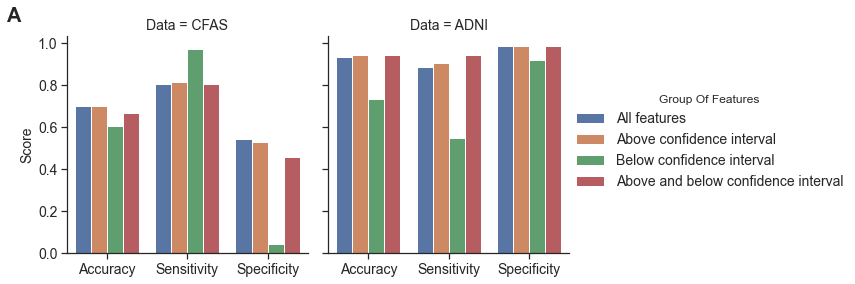

In [20]:
cfas_rf_copy = cfas_rf[0:4]
cfas_rf_copy['group of features'] = ['All features', 'Above confidence interval','Below confidence interval', 'Above and below confidence interval']
adni_smote_rf_copy = adni_smote_rf[0:4]
adni_smote_rf_copy['group of features'] = ['All features', 'Above confidence interval','Below confidence interval', 'Above and below confidence interval']

cfas_rf_tidy = cfas_rf_copy.melt(id_vars='group of features').rename(columns=str.title)
adni_smote_rf_tidy = adni_smote_rf_copy.melt(id_vars='group of features').rename(columns=str.title)

adni_smote_rf_tidy['Data'] = 'ADNI'
adni_smote_rf_tidy
cfas_rf_tidy['Data'] = 'CFAS'
cfas_rf_tidy
both_results_rf = pd.concat([cfas_rf_tidy, adni_smote_rf_tidy], ignore_index=True)
both_results_rf.rename(columns = {'Value':'Score'}, inplace = True)


sns.set_theme(style="white")
size = 14
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=size)    # legend fontsize
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels

sns.set_style('ticks')

g=sns.catplot(x='Variable', y='Score',
                hue='Group Of Features', col="Data",
                data=both_results_rf, kind="bar", aspect=1,height = 4)

plt.text(-4.5, 1.1,  'A', size=20, weight='bold')

g.set(xlabel=None)
# sns.despine()

plt.savefig('Figures/classifier_rf.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/classifier_rf.pdf', dpi=300, bbox_inches='tight')

### Naive Bayes

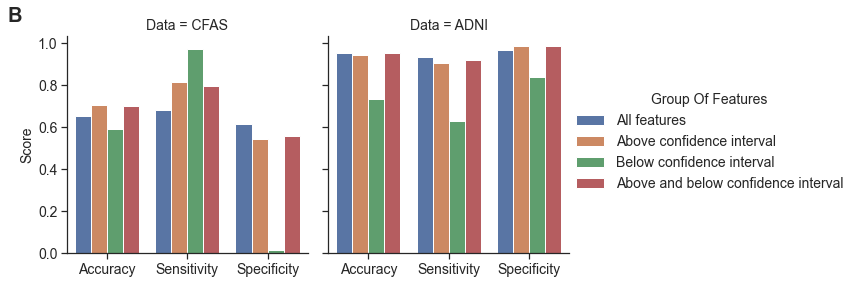

In [21]:
cfas_gnb_copy = cfas_gnb[0:4]
cfas_gnb_copy['group of features'] = ['All features', 'Above confidence interval','Below confidence interval', 'Above and below confidence interval']
adni_smote_gnb_copy = adni_smote_gnb[0:4]
adni_smote_gnb_copy['group of features'] = ['All features', 'Above confidence interval','Below confidence interval', 'Above and below confidence interval']


cfas_gnb_tidy = cfas_gnb_copy.melt(id_vars='group of features').rename(columns=str.title)
adni_smote_gnb_tidy = adni_smote_gnb_copy.melt(id_vars='group of features').rename(columns=str.title)

adni_smote_gnb_tidy['Data'] = 'ADNI'
adni_smote_gnb_tidy
cfas_gnb_tidy['Data'] = 'CFAS'
cfas_gnb_tidy
both_results_gnb = pd.concat([cfas_gnb_tidy, adni_smote_gnb_tidy], ignore_index=True)
both_results_gnb.rename(columns = {'Value':'Score'}, inplace = True)



sns.set_theme(style="white")
size = 16
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rcParams['legend.title_fontsize'] =14
sns.set_style('ticks')

# fig.set_size_inches(5, 5)
g=sns.catplot(x='Variable', y='Score',
                hue='Group Of Features', col="Data",
                data=both_results_gnb, kind="bar", aspect=1,height = 4)


plt.text(-4.5, 1.1, 'B', size=20, weight='bold')
g.set(xlabel=None)

plt.savefig('Figures/classifier_gnb.png', dpi=300, bbox_inches='tight')
plt.savefig('Figures/classifier_gnb.pdf', dpi=300, bbox_inches='tight')